In [78]:
import glob
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt

from tensorflow import keras

# autoencode 시킬 이미지 불러오기

In [79]:
instrument_Names = ['sexophone', 'acoustic', 'black','blue']
instrument_images = [[] for _ in range(len(instrument_Names))]  # 악기별 이미지 리스트

for idx, name in enumerate(instrument_Names):
    for image in glob.glob('../../Data/%ssaved/*.jpg' % name):
        img = Image.open(image)
        img_array = np.array(img, dtype=np.int32)
        instrument_images[idx].append(img_array)

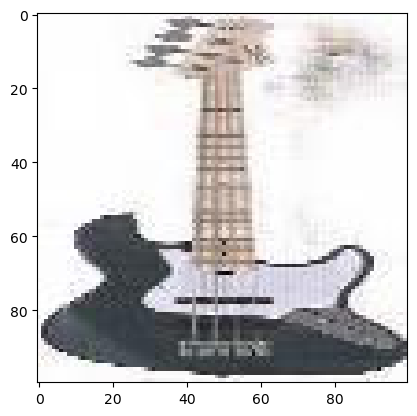

In [116]:
plt.imshow(instrument_images[2][0])
plt.show()

# h5 모델 불러오기

In [117]:
model = keras.models.load_model('color_autoencoder_best_black.h5')

In [118]:
number_of_data = len(instrument_images[2])
img_width_size = 100
img_height_size = 100

In [119]:
input = np.zeros(number_of_data*img_width_size*img_height_size*3).reshape(number_of_data, img_width_size, img_height_size,3)
i=0

instrument_Names = ['black']

for name in instrument_Names:
    try :
      for file in glob.glob('../../Data/%ssaved/*.jpg' % name):
          img = Image.open(file)
          img_array = np.array(img)
          input[i,:,:] = img_array
          i+=1
    except :
      print(file, 'error')
      
      

In [120]:
input.shape

(2491, 100, 100, 3)

In [121]:
input = input.reshape(-1, 100, 100, 3) / 255.0

In [122]:
DecodedDigits = model.predict(input)

78/78 [==============================] - 3s 38ms/step


# 생성된 그림 시각화

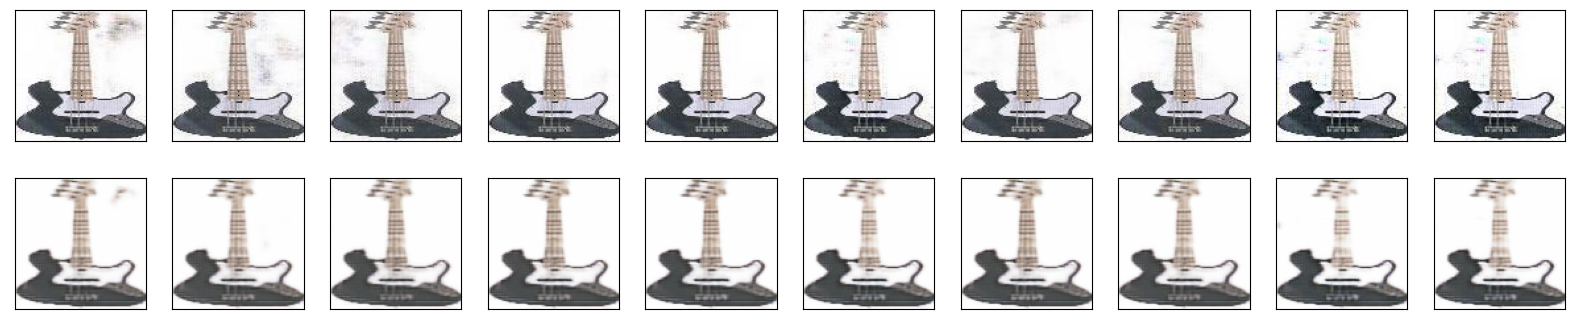

In [123]:
# test data 시각화
n=10
plt.figure(figsize=(20,4))
for i in range(n):
    ax=plt.subplot(2,n,i+1)
    plt.imshow(input[i].reshape(100,100,3))
    ax.get_xaxis().set_visible(False)#축 안보여주겠다.
    ax.get_yaxis().set_visible(False)#축 안보여주겠다.
    plt.gray()
    #-----------------
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(DecodedDigits[i].reshape(100,100,3))
    ax.get_xaxis().set_visible(False)#축 안보여주겠다.
    ax.get_yaxis().set_visible(False)#축 안보여주겠다.
    plt.gray()
plt.show()#위에가 원본 데이터 밑에가 압축되어 나온 데이터이다. data size가 줄어든 것을 확인할 수 있다.

In [124]:

i = 1
for image in DecodedDigits:
  scaled_data = np.interp(image, (image.min(), image.max()), (0, 255)).astype(np.uint8) #이렇게 해줘야 int32를 저장할 수 있음
  finalimage = Image.fromarray(scaled_data)
  finalimage.save('../../Data/blackfinal/%05d.jpg'%i, 'JPEG')
  i+=1
